## 回帰 (家賃の予測)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# データの読み込み
df = pd.read_csv('data/housing.csv')
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


- 入力変数と教師データの切り分け
- Numpy形式に変換
- 訓練データと検証データに分割
- シードの固定
- モデルの構築
- モデルのコンパイル
- 学習
- 結果の可視化

In [4]:
# 入力変数と教師データの切り分け
t = df.iloc[:, -1]
t.head(3)

0    24.0
1    21.6
2    34.7
Name: y, dtype: float64

In [5]:
x = df.iloc[:, :-1] # x = df.iloc[].values
x.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [6]:
# Numpy形式に変換
x = x.values
type(x)

numpy.ndarray

In [7]:
t = t.values
type(t)

numpy.ndarray

In [8]:
# 訓練データと検証データに分割
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.7 , random_state=0)

In [10]:
# シードの固定
import os
import random


def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定
    
reset_seed(0)

In [11]:
tf.version.VERSION

'2.0.0'

In [12]:
# モデルの構築
# model = models.Sequential() # モデルのインスタンス化

In [13]:
# モデルの構築
from tensorflow.keras import models,layers

model = models.Sequential()

In [14]:
x.shape

(506, 13)

In [15]:
# y.shape

In [16]:
model.add(layers.BatchNormalization())
model.add(layers.Dense(5, activation='relu', input_shape=(13,)))
# model.add(layers.Dense(1, activation='softmax'))
model.add(layers.Dense(1))

In [17]:
# # モデルのコンパイル
# model.compile(optimizer='SGD',
#                loss='mean_squared_error',
#                metrics=['accuracy'])

In [18]:
#最適化手法の設定
optimizer = keras.optimizers.SGD(lr=0.1) # lr = learning rate

#モデルのコンパイル
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [19]:
# 学習
history = model.fit(x_train, t_train,
                   batch_size=10,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val, t_val))

Train on 151 samples, validate on 355 samples
Epoch 1/50
151/151 [==============================] - 1s 4ms/sample - loss: nan - val_loss: nan
Epoch 2/50
151/151 [==============================] - 0s 428us/sample - loss: nan - val_loss: nan
Epoch 3/50
151/151 [==============================] - 0s 429us/sample - loss: nan - val_loss: nan
Epoch 4/50
151/151 [==============================] - 0s 432us/sample - loss: nan - val_loss: nan
Epoch 5/50
151/151 [==============================] - 0s 437us/sample - loss: nan - val_loss: nan
Epoch 6/50
151/151 [==============================] - 0s 421us/sample - loss: nan - val_loss: nan
Epoch 7/50
151/151 [==============================] - 0s 426us/sample - loss: nan - val_loss: nan
Epoch 8/50
151/151 [==============================] - 0s 429us/sample - loss: nan - val_loss: nan
Epoch 9/50
151/151 [==============================] - 0s 476us/sample - loss: nan - val_loss: nan
Epoch 10/50
151/151 [==============================] - 0s 440us/sample - l

In [20]:
# 結果の可視化
results = pd.DataFrame(history.history)
results

,loss,val_loss
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


(80, 100)

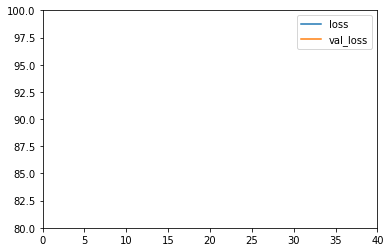

In [21]:
# results[['accuracy', 'val_accuracy']].plot()
# loss（損失関数）を表示
graph = results[['loss', 'val_loss']].plot()
graph.set_xlim([0,40])
graph.set_ylim([80,100])

In [22]:
# results[['loss', 'val_loss']].plot()

#最終誤差のオリジナルスケールでの表示
np.sqrt(results.iloc[-1,1])

nan

In [23]:
np.set_printoptions(precision=3, suppress=True)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
x_train2 = x_train
x_train2 == x_train

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(x_train2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
x_train3 = scaler.transform(x_train2)
x_val3 = scaler.transform(x_val)

In [29]:
x_train3

array([[ 2.589, -0.502,  0.96 , ...,  0.792,  0.393,  0.094],
       [-0.511, -0.502, -0.892, ...,  0.017,  0.382,  0.016],
       [-0.395,  0.333, -0.962, ..., -2.493,  0.232,  0.276],
       ...,
       [-0.495, -0.502, -0.141, ..., -0.303,  0.363, -0.328],
       [-0.483, -0.502, -0.563, ..., -0.257,  0.341,  0.815],
       [-0.497, -0.502, -0.952, ..., -0.851,  0.393,  0.262]])

In [30]:
type(x_train3)

numpy.ndarray

In [31]:
x_train3.shape

(151, 13)

In [32]:
x_val3

array([[-0.509, -0.502, -1.062, ..., -0.714,  0.12 , -0.726],
       [ 0.944, -0.502,  0.96 , ...,  0.792,  0.006, -0.432],
       [-0.501, -0.502,  0.387, ..., -0.942,  0.353, -0.301],
       ...,
       [-0.511,  0.875, -1.206, ..., -0.029,  0.393, -0.701],
       [-0.414,  0.333, -0.962, ..., -2.493,  0.222, -0.666],
       [-0.501,  0.02 , -0.432, ..., -1.489,  0.393,  0.071]])

In [33]:
type(x_val3)

numpy.ndarray

In [34]:
x_val3.shape

(355, 13)

In [35]:
model.add(layers.BatchNormalization())
model.add(layers.Dense(9, activation='relu', input_shape=(13,)))
model.add(layers.Dense(5, activation='relu', input_shape=(13,)))
model.add(layers.Dense(1))

In [36]:
#最適化手法の設定
optimizer = keras.optimizers.SGD(0.1)

#モデルのコンパイル
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [37]:
history = model.fit(x_train3, t_train,
                   batch_size=64,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val3, t_val))

Train on 151 samples, validate on 355 samples
Epoch 1/50
151/151 [==============================] - 1s 6ms/sample - loss: nan - val_loss: nan
Epoch 2/50
151/151 [==============================] - 0s 135us/sample - loss: nan - val_loss: nan
Epoch 3/50
151/151 [==============================] - 0s 128us/sample - loss: nan - val_loss: nan
Epoch 4/50
151/151 [==============================] - 0s 136us/sample - loss: nan - val_loss: nan
Epoch 5/50
151/151 [==============================] - 0s 125us/sample - loss: nan - val_loss: nan
Epoch 6/50
151/151 [==============================] - 0s 126us/sample - loss: nan - val_loss: nan
Epoch 7/50
151/151 [==============================] - 0s 135us/sample - loss: nan - val_loss: nan
Epoch 8/50
151/151 [==============================] - 0s 149us/sample - loss: nan - val_loss: nan
Epoch 9/50
151/151 [==============================] - 0s 178us/sample - loss: nan - val_loss: nan
Epoch 10/50
151/151 [==============================] - 0s 164us/sample - l

In [38]:
# 結果の可視化
results2 = pd.DataFrame(history.history)
results2.tail()

,loss,val_loss
45,NaN,NaN
46,NaN,NaN
47,NaN,NaN
48,NaN,NaN
49,NaN,NaN


(80, 100)

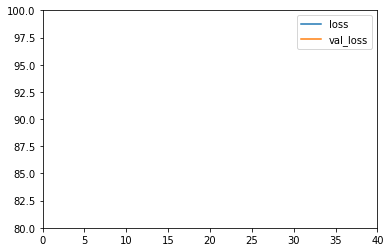

In [39]:
# loss（損失関数）を表示
graph = results[['loss', 'val_loss']].plot()
graph.set_xlim([0,40])
graph.set_ylim([80,100])

In [40]:
#最終誤差のオリジナルスケールでの表示
np.sqrt(results.iloc[-1,1])

nan

# 演習
- 層、ノードを増やす
- 活性化関数を変える
- バッチサイズ、エポック数
- 最適化関数(Adam)
- 学習係数

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [42]:
# データの読み込み
df = pd.read_csv('data/housing.csv')
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [43]:
# 入力変数と教師データの切り分け
t = df.iloc[:, -1]
t = t.values

In [44]:
x = df.iloc[:, :-1]
x = x.values

In [45]:
type(x), type(t)

(numpy.ndarray, numpy.ndarray)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.7 , random_state=0)

In [47]:
import os
import random


def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定
    
reset_seed(0)

In [48]:
model = models.Sequential()

In [49]:
x.shape

(506, 13)

In [50]:
# from tensorflow.keras import keras.kayers.advanced_activations

In [51]:
# 層、ノードを増やす
# 活性化関数を変える
# バッチサイズ、エポック数
# 最適化関数(Adam)
# 学習係数

model.add(layers.Dense(9, activation='linear', input_shape=(13,)))
model.add(layers.Dense(5, activation='linear', input_shape=(13,)))
model.add(layers.Dense(1))

optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(loss='mean_squared_error', optimizer=optimizer)

history = model.fit(x_train, t_train,
                   batch_size=10,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val, t_val))

Train on 151 samples, validate on 355 samples
Epoch 1/50
151/151 [==============================] - 0s 3ms/sample - loss: 3466.2491 - val_loss: 2590.2241
Epoch 2/50
151/151 [==============================] - 0s 453us/sample - loss: 1601.9054 - val_loss: 1109.5403
Epoch 3/50
151/151 [==============================] - 0s 436us/sample - loss: 671.8061 - val_loss: 476.1721
Epoch 4/50
151/151 [==============================] - 0s 463us/sample - loss: 341.7991 - val_loss: 245.2424
Epoch 5/50
151/151 [==============================] - 0s 433us/sample - loss: 237.3799 - val_loss: 182.9362
Epoch 6/50
151/151 [==============================] - 0s 416us/sample - loss: 205.8946 - val_loss: 163.7313
Epoch 7/50
151/151 [==============================] - 0s 408us/sample - loss: 187.1286 - val_loss: 148.4384
Epoch 8/50
151/151 [==============================] - 0s 410us/sample - loss: 179.0100 - val_loss: 141.9470
Epoch 9/50
151/151 [==============================] - 0s 417us/sample - loss: 167.0570 -

In [52]:
results = pd.DataFrame(history.history)

(80, 100)

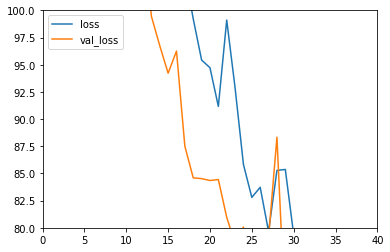

In [53]:
graph = results[['loss', 'val_loss']].plot()
graph.set_xlim([0,40])
graph.set_ylim([80,100])

In [54]:
np.sqrt(results.iloc[-1,1])

8.01767839412681

In [55]:
# 層、ノードを増やす
# 活性化関数を変える
# バッチサイズ、エポック数
# 最適化関数(Adam)
# 学習係数

model.add(layers.Dense(9, activation='linear', input_shape=(13,)))
model.add(layers.Dense(5, activation='linear', input_shape=(13,)))
model.add(layers.Dense(1))

optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(loss='mean_squared_error', optimizer=optimizer)

history = model.fit(x_train, t_train,
                   batch_size=64,
                   epochs=100,
                   verbose=1,
                   validation_data=(x_val, t_val))

Train on 151 samples, validate on 355 samples
Epoch 1/100
151/151 [==============================] - 1s 5ms/sample - loss: 1117.9226 - val_loss: 806.6535
Epoch 2/100
151/151 [==============================] - 0s 133us/sample - loss: 826.0618 - val_loss: 606.9816
Epoch 3/100
151/151 [==============================] - 0s 122us/sample - loss: 634.1335 - val_loss: 473.8880
Epoch 4/100
151/151 [==============================] - 0s 122us/sample - loss: 507.8939 - val_loss: 378.7815
Epoch 5/100
151/151 [==============================] - 0s 118us/sample - loss: 414.8240 - val_loss: 303.9298
Epoch 6/100
151/151 [==============================] - 0s 119us/sample - loss: 339.8699 - val_loss: 241.7677
Epoch 7/100
151/151 [==============================] - 0s 119us/sample - loss: 277.6395 - val_loss: 193.1238
Epoch 8/100
151/151 [==============================] - 0s 117us/sample - loss: 230.2417 - val_loss: 161.7444
Epoch 9/100
151/151 [==============================] - 0s 120us/sample - loss: 208.

Epoch 76/100
151/151 [==============================] - 0s 123us/sample - loss: 94.4832 - val_loss: 78.1423
Epoch 77/100
151/151 [==============================] - 0s 116us/sample - loss: 94.2713 - val_loss: 77.8615
Epoch 78/100
151/151 [==============================] - 0s 120us/sample - loss: 93.5664 - val_loss: 77.9150
Epoch 79/100
151/151 [==============================] - 0s 116us/sample - loss: 93.4175 - val_loss: 77.9342
Epoch 80/100
151/151 [==============================] - 0s 118us/sample - loss: 93.0532 - val_loss: 77.9003
Epoch 81/100
151/151 [==============================] - 0s 117us/sample - loss: 92.7980 - val_loss: 78.0072
Epoch 82/100
151/151 [==============================] - 0s 119us/sample - loss: 92.7351 - val_loss: 78.0131
Epoch 83/100
151/151 [==============================] - 0s 118us/sample - loss: 92.3294 - val_loss: 77.9295
Epoch 84/100
151/151 [==============================] - 0s 122us/sample - loss: 92.0389 - val_loss: 77.7832
Epoch 85/100
151/151 [======

(80, 100)

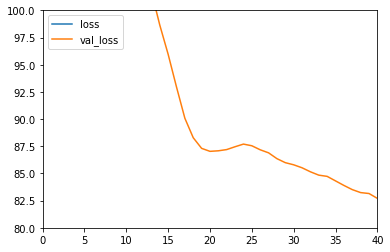

In [56]:
results = pd.DataFrame(history.history)
graph = results[['loss', 'val_loss']].plot()
graph.set_xlim([0,40])
graph.set_ylim([80,100])

In [57]:
np.sqrt(results.iloc[-1,1])

8.677117500211894

In [58]:
from sklearn.preprocessing import StandardScaler
x_train2 = x_train
x_train2 == x_train

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [59]:
scaler = StandardScaler()

In [60]:
scaler.fit(x_train2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
x_train3 = scaler.transform(x_train2)
x_val3 = scaler.transform(x_val)

In [62]:
x_train3

array([[ 2.589, -0.502,  0.96 , ...,  0.792,  0.393,  0.094],
       [-0.511, -0.502, -0.892, ...,  0.017,  0.382,  0.016],
       [-0.395,  0.333, -0.962, ..., -2.493,  0.232,  0.276],
       ...,
       [-0.495, -0.502, -0.141, ..., -0.303,  0.363, -0.328],
       [-0.483, -0.502, -0.563, ..., -0.257,  0.341,  0.815],
       [-0.497, -0.502, -0.952, ..., -0.851,  0.393,  0.262]])

In [63]:
type(x_train3)

numpy.ndarray

In [64]:
type(x_val3)

numpy.ndarray

In [65]:
type(t_train)

numpy.ndarray

In [66]:
type(t_val)

numpy.ndarray

In [67]:
model.add(layers.Dense(9, activation='linear', input_shape=(13,)))
model.add(layers.Dense(5, activation='linear', input_shape=(13,)))
model.add(layers.Dense(1))

optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(loss='mean_squared_error', optimizer=optimizer)

history = model.fit(x_train3, t_train,
                   batch_size=32,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val3, t_val))

Train on 151 samples, validate on 355 samples
Epoch 1/50
151/151 [==============================] - 1s 4ms/sample - loss: 632.2049 - val_loss: 579.8489
Epoch 2/50
151/151 [==============================] - 0s 190us/sample - loss: 629.1480 - val_loss: 577.2909
Epoch 3/50
151/151 [==============================] - 0s 192us/sample - loss: 626.6002 - val_loss: 575.0510
Epoch 4/50
151/151 [==============================] - 0s 189us/sample - loss: 624.4480 - val_loss: 573.0929
Epoch 5/50
151/151 [==============================] - 0s 196us/sample - loss: 622.5681 - val_loss: 571.3842
Epoch 6/50
151/151 [==============================] - 0s 191us/sample - loss: 620.8985 - val_loss: 569.8697
Epoch 7/50
151/151 [==============================] - 0s 185us/sample - loss: 619.4064 - val_loss: 568.4484
Epoch 8/50
151/151 [==============================] - 0s 195us/sample - loss: 617.9436 - val_loss: 567.0135
Epoch 9/50
151/151 [==============================] - 0s 187us/sample - loss: 616.4754 - val

(80, 100)

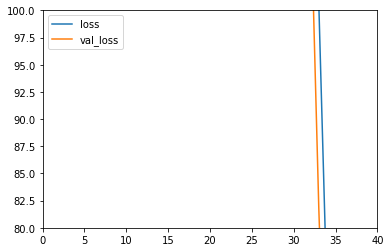

In [68]:
results = pd.DataFrame(history.history)
graph = results[['loss', 'val_loss']].plot()
graph.set_xlim([0,40])
graph.set_ylim([80,100])

In [69]:
np.sqrt(results.iloc[-1,1])

5.505346740476276

In [70]:
# model.add(layers.BatchNormalization())
# model.add(layers.Dense(9, activation='linear', input_shape=(13,)))
# model.add(layers.Dense(5, activation='linear', input_shape=(13,)))
# model.add(layers.Dense(1))

# optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# model.compile(loss='mean_squared_error', optimizer=optimizer)

# history = model.fit(x_train3, t_train,
#                    batch_size=10,
#                    epochs=50,
#                    verbose=1,
#                    validation_data=(x_val3, t_val))

In [71]:
# results = pd.DataFrame(history.history)
# graph = results[['loss', 'val_loss']].plot()
# graph.set_xlim([0,40])
# graph.set_ylim([80,100])

In [72]:
# np.sqrt(results.iloc[-1,1])

In [73]:
# x_train3

In [74]:
# x_val3

In [75]:
# model.add(layers.Dense(9, activation='linear', input_shape=(13,)))
# model.add(layers.Dense(5, activation='linear', input_shape=(13,)))
# model.add(layers.Dense(1))

# optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# model.compile(loss='mean_squared_error', optimizer=optimizer)

# history = model.fit(x_train3, t_train,
#                    batch_size=32,
#                    epochs=50,
#                    verbose=1,
#                    validation_data=(x_val3, t_val))

In [76]:
# results = pd.DataFrame(history.history)
# graph = results[['loss', 'val_loss']].plot()
# graph.set_xlim([0,40])
# graph.set_ylim([80,100])

In [77]:
# np.sqrt(results.iloc[-1,1])

In [78]:
# model.add(layers.Dense(9, activation='linear', input_shape=(13,)))
# model.add(layers.Dense(5, activation='linear', input_shape=(13,)))
# model.add(layers.Dense(1))

# optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# model.compile(loss='mean_squared_error', optimizer=optimizer)

# history = model.fit(x_train3, t_train,
#                    batch_size=32,
#                    epochs=50,
#                    verbose=1,
#                    validation_data=(x_val3, t_val))

In [79]:
# results = pd.DataFrame(history.history)
# graph = results[['loss', 'val_loss']].plot()
# graph.set_xlim([0,40])
# graph.set_ylim([80,100])

In [80]:
# np.sqrt(results.iloc[-1,1])

In [81]:
df_corr = df.corr()
df_corr.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
x2,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
x3,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
x4,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
x5,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


In [82]:
import seaborn as sns

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


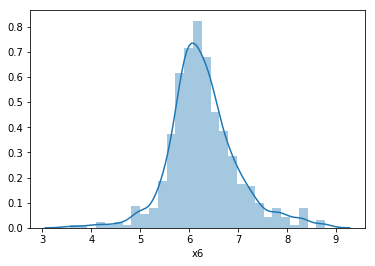

In [83]:
sns.distplot(df['x6'])

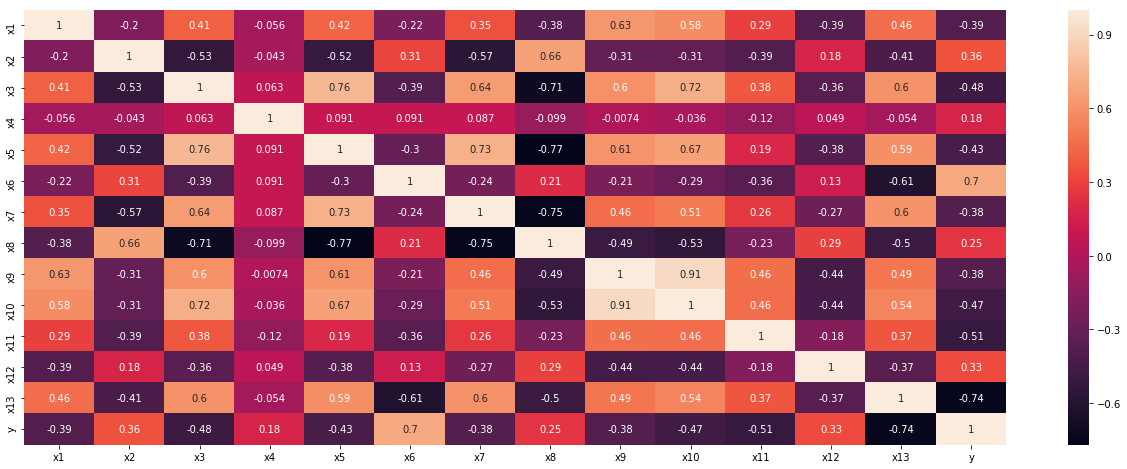

In [84]:
plt.figure(figsize=(22,8))
sns.heatmap(df_corr, annot=True)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


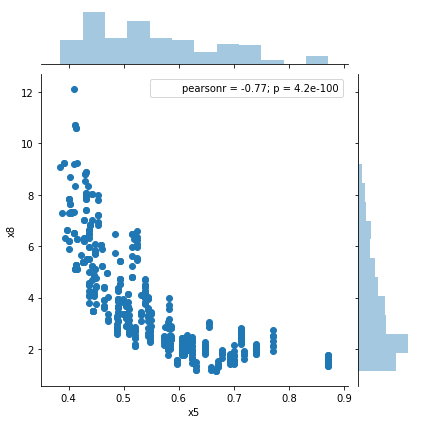

In [85]:
sns.jointplot('x5', 'x8', df)

In [86]:
df1 = df.drop('x4', axis=1)
df1.head()

,x1,x2,x3,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [87]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [88]:
x2 = df.iloc[:, :-1].values.astype('f')
t2 = df.iloc[:, -1].values.astype('f')

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


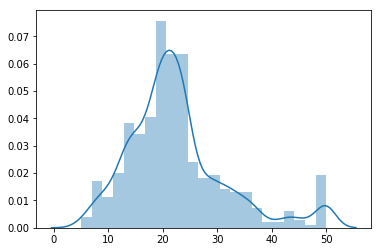

In [89]:
sns.distplot(t)

In [90]:
gt47 = df.index[df['y']>47]
df_fixed = df.drop(gt47)

In [114]:
df_fixed.head

<bound method NDFrame.head of            x1    x2     x3  x4     x5     x6     x7      x8  x9  x10   x11  \
0     0.00632  18.0   2.31   0  0.538  6.575   65.2  4.0900   1  296  15.3   
1     0.02731   0.0   7.07   0  0.469  6.421   78.9  4.9671   2  242  17.8   
2     0.02729   0.0   7.07   0  0.469  7.185   61.1  4.9671   2  242  17.8   
3     0.03237   0.0   2.18   0  0.458  6.998   45.8  6.0622   3  222  18.7   
4     0.06905   0.0   2.18   0  0.458  7.147   54.2  6.0622   3  222  18.7   
5     0.02985   0.0   2.18   0  0.458  6.430   58.7  6.0622   3  222  18.7   
6     0.08829  12.5   7.87   0  0.524  6.012   66.6  5.5605   5  311  15.2   
7     0.14455  12.5   7.87   0  0.524  6.172   96.1  5.9505   5  311  15.2   
8     0.21124  12.5   7.87   0  0.524  5.631  100.0  6.0821   5  311  15.2   
9     0.17004  12.5   7.87   0  0.524  6.004   85.9  6.5921   5  311  15.2   
10    0.22489  12.5   7.87   0  0.524  6.377   94.3  6.3467   5  311  15.2   
11    0.11747  12.5   7.87   0  0.

In [92]:
_x = df_fixed.iloc[:, :-1].values.astype('f')
_t = df_fixed.iloc[:, -1].values.astype('f')

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


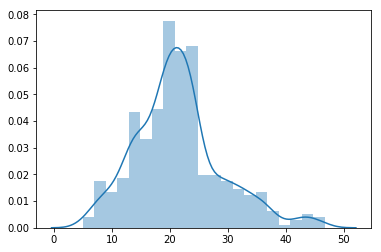

In [93]:
sns.distplot(_t)

In [94]:
type(_t)

numpy.ndarray

In [95]:
_x

array([[  0.006,  18.   ,   2.31 , ...,  15.3  , 396.9  ,   4.98 ],
       [  0.027,   0.   ,   7.07 , ...,  17.8  , 396.9  ,   9.14 ],
       [  0.027,   0.   ,   7.07 , ...,  17.8  , 392.83 ,   4.03 ],
       ...,
       [  0.061,   0.   ,  11.93 , ...,  21.   , 396.9  ,   5.64 ],
       [  0.11 ,   0.   ,  11.93 , ...,  21.   , 393.45 ,   6.48 ],
       [  0.047,   0.   ,  11.93 , ...,  21.   , 396.9  ,   7.88 ]],
      dtype=float32)

In [96]:
x_train, x_val, t_train, t_val = train_test_split(_x, _t, test_size=0.7 , random_state=0)

In [97]:
x_train2 = x_train
x_train2 == x_train

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [98]:
scaler = StandardScaler()
scaler.fit(x_train2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [99]:
x_train3 = scaler.transform(x_train2)
x_val3 = scaler.transform(x_val)
x_train3

array([[-0.429,  0.273, -0.534, ...,  0.05 ,  0.396, -0.887],
       [-0.435, -0.027, -0.408, ..., -1.662,  0.396,  0.02 ],
       [ 0.724, -0.527,  1.017, ...,  0.856,  0.396,  1.423],
       ...,
       [-0.43 , -0.527, -0.109, ..., -0.352,  0.367, -0.383],
       [-0.42 , -0.527, -0.541, ..., -0.302,  0.346,  0.771],
       [-0.441, -0.527, -0.94 , ..., -0.957,  0.352, -0.409]],
      dtype=float32)

In [100]:
type(x_train3)

numpy.ndarray

In [101]:
# 層、ノードを増やす
# 活性化関数を変える
# バッチサイズ、エポック数
# 最適化関数(Adam)
# 学習係数

model.add(layers.Dense(9, activation='linear', input_shape=(13,)))
model.add(layers.Dense(5, activation='linear', input_shape=(13,)))
model.add(layers.Dense(1))

optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(loss='mean_squared_error', optimizer=optimizer)

history = model.fit(x_train3, t_train,
                   batch_size=32,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val3, t_val))

Train on 146 samples, validate on 341 samples
Epoch 1/50
146/146 [==============================] - 1s 6ms/sample - loss: 2004.1248 - val_loss: 1759.6851
Epoch 2/50
146/146 [==============================] - 0s 207us/sample - loss: 1694.1234 - val_loss: 1504.6908
Epoch 3/50
146/146 [==============================] - 0s 205us/sample - loss: 1453.7229 - val_loss: 1309.3284
Epoch 4/50
146/146 [==============================] - 0s 192us/sample - loss: 1273.2185 - val_loss: 1158.5753
Epoch 5/50
146/146 [==============================] - 0s 201us/sample - loss: 1134.9833 - val_loss: 1041.2764
Epoch 6/50
146/146 [==============================] - 0s 193us/sample - loss: 1026.8859 - val_loss: 949.2355
Epoch 7/50
146/146 [==============================] - 0s 198us/sample - loss: 941.6792 - val_loss: 875.9272
Epoch 8/50
146/146 [==============================] - 0s 227us/sample - loss: 874.0821 - val_loss: 816.4960
Epoch 9/50
146/146 [==============================] - 0s 199us/sample - loss: 818

(80, 100)

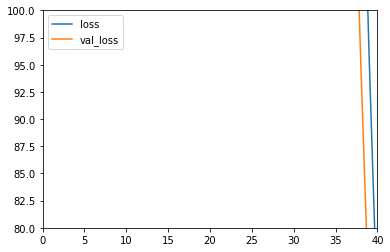

In [102]:
results = pd.DataFrame(history.history)
graph = results[['loss', 'val_loss']].plot()
graph.set_xlim([0,40])
graph.set_ylim([80,100])

In [103]:
np.sqrt(results.iloc[-1,1])

4.450111138847254

In [104]:
model.add(layers.Dense(32, activation='linear', input_shape=(13,)))
model.add(layers.Dense(64, activation='linear', input_shape=(13,)))
model.add(layers.Dense(32, activation='linear', input_shape=(13,)))
model.add(layers.Dense(16, activation='linear', input_shape=(13,)))
model.add(layers.Dense(8, activation='linear', input_shape=(13,)))
model.add(layers.Dense(4, activation='linear', input_shape=(13,)))
model.add(layers.Dense(2, activation='linear', input_shape=(13,)))
model.add(layers.Dense(1))

optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(loss='mean_squared_error', optimizer=optimizer)

history = model.fit(x_train3, t_train,
                   batch_size=32,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val3, t_val))

Train on 146 samples, validate on 341 samples
Epoch 1/50
146/146 [==============================] - 1s 9ms/sample - loss: 497.9016 - val_loss: 175.6386
Epoch 2/50
146/146 [==============================] - 0s 245us/sample - loss: 89.6130 - val_loss: 37.0527
Epoch 3/50
146/146 [==============================] - 0s 237us/sample - loss: 69.4875 - val_loss: 75.5732
Epoch 4/50
146/146 [==============================] - 0s 242us/sample - loss: 37.5772 - val_loss: 18.2192
Epoch 5/50
146/146 [==============================] - 0s 239us/sample - loss: 20.8058 - val_loss: 31.7076
Epoch 6/50
146/146 [==============================] - 0s 227us/sample - loss: 31.1568 - val_loss: 24.8315
Epoch 7/50
146/146 [==============================] - 0s 227us/sample - loss: 18.9966 - val_loss: 18.1165
Epoch 8/50
146/146 [==============================] - 0s 236us/sample - loss: 15.2734 - val_loss: 23.5415
Epoch 9/50
146/146 [==============================] - 0s 244us/sample - loss: 16.8755 - val_loss: 18.7246


(80, 100)

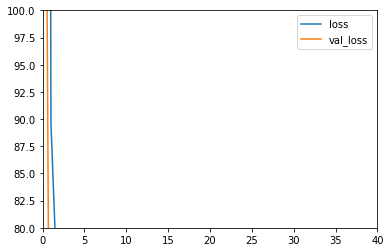

In [105]:
results = pd.DataFrame(history.history)
graph = results[['loss', 'val_loss']].plot()
graph.set_xlim([0,40])
graph.set_ylim([80,100])

In [106]:
np.sqrt(results.iloc[-1,1])

3.9770970035403432

In [107]:
# model.add(layers.Dense(32, activation='relu', input_shape=(13,)))
# model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
# model.add(layers.Dense(32, activation='relu', input_shape=(13,)))
# model.add(layers.Dense(16, activation='relu', input_shape=(13,)))
# model.add(layers.Dense(8, activation='relu', input_shape=(13,)))
# model.add(layers.Dense(4, activation='relu', input_shape=(13,)))
# model.add(layers.Dense(2, activation='relu', input_shape=(13,)))
# model.add(layers.Dense(1))

# optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# model.compile(loss='mean_squared_error', optimizer=optimizer)

# history = model.fit(x_train3, t_train,
#                    batch_size=32,
#                    epochs=50,
#                    verbose=1,
#                    validation_data=(x_val3, t_val))

In [108]:
# model.add(layers.Dense(32, activation='softplus', input_shape=(13,)))
# model.add(layers.Dense(64, activation='softplus', input_shape=(13,)))
# model.add(layers.Dense(32, activation='softplus', input_shape=(13,)))
# model.add(layers.Dense(16, activation='softplus', input_shape=(13,)))
# model.add(layers.Dense(8, activation='softplus', input_shape=(13,)))
# model.add(layers.Dense(4, activation='softplus', input_shape=(13,)))
# model.add(layers.Dense(2, activation='softplus', input_shape=(13,)))
# model.add(layers.Dense(1))

# optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# model.compile(loss='mean_squared_error', optimizer=optimizer)

# history = model.fit(x_train3, t_train,
#                    batch_size=32,
#                    epochs=50,
#                    verbose=1,
#                    validation_data=(x_val3, t_val))

In [109]:
# model.add(layers.Dense(32, activation='sigmoid', input_shape=(13,)))
# model.add(layers.Dense(64, activation='sigmoid', input_shape=(13,)))
# model.add(layers.Dense(32, activation='sigmoid', input_shape=(13,)))
# model.add(layers.Dense(16, activation='sigmoid', input_shape=(13,)))
# model.add(layers.Dense(8, activation='sigmoid', input_shape=(13,)))
# model.add(layers.Dense(4, activation='sigmoid', input_shape=(13,)))
# model.add(layers.Dense(2, activation='sigmoid', input_shape=(13,)))
# model.add(layers.Dense(1))

# optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# model.compile(loss='mean_squared_error', optimizer=optimizer)

# history = model.fit(x_train3, t_train,
#                    batch_size=32,
#                    epochs=100,
#                    verbose=1,
#                    validation_data=(x_val3, t_val))

In [110]:
# model.add(layers.Dense(32, activation='linear', input_shape=(13,)))
# model.add(layers.Dense(64, activation='linear', input_shape=(13,)))
# model.add(layers.Dense(32, activation='linear', input_shape=(13,)))
# model.add(layers.Dense(16, activation='linear', input_shape=(13,)))
# model.add(layers.Dense(8, activation='linear', input_shape=(13,)))
# model.add(layers.Dense(4, activation='linear', input_shape=(13,)))
# model.add(layers.Dense(2, activation='linear', input_shape=(13,)))
# model.add(layers.Dense(1))

# optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# model.compile(loss='mean_squared_error', optimizer=optimizer)

# history = model.fit(x_train3, t_train,
#                    batch_size=32,
#                    epochs=100,
#                    verbose=1,
#                    validation_data=(x_val3, t_val))

Train on 146 samples, validate on 341 samples
Epoch 1/100
146/146 [==============================] - 2s 13ms/sample - loss: 507.8002 - val_loss: 179.2838
Epoch 2/100
146/146 [==============================] - 0s 275us/sample - loss: 85.7033 - val_loss: 110.5882
Epoch 3/100
146/146 [==============================] - 0s 252us/sample - loss: 72.1540 - val_loss: 15.7663
Epoch 4/100
146/146 [==============================] - 0s 247us/sample - loss: 31.0989 - val_loss: 48.7997
Epoch 5/100
146/146 [==============================] - 0s 247us/sample - loss: 38.2257 - val_loss: 16.5762
Epoch 6/100
146/146 [==============================] - 0s 246us/sample - loss: 15.4071 - val_loss: 30.6398
Epoch 7/100
146/146 [==============================] - 0s 241us/sample - loss: 18.0512 - val_loss: 15.7570
Epoch 8/100
146/146 [==============================] - 0s 258us/sample - loss: 14.5941 - val_loss: 18.7701
Epoch 9/100
146/146 [==============================] - 0s 249us/sample - loss: 12.8616 - val_los

146/146 [==============================] - 0s 232us/sample - loss: 10.8184 - val_loss: 15.1695
Epoch 77/100
146/146 [==============================] - 0s 230us/sample - loss: 10.4365 - val_loss: 15.5508
Epoch 78/100
146/146 [==============================] - 0s 230us/sample - loss: 10.6342 - val_loss: 15.2818
Epoch 79/100
146/146 [==============================] - 0s 232us/sample - loss: 10.6415 - val_loss: 15.3114
Epoch 80/100
146/146 [==============================] - 0s 236us/sample - loss: 10.5903 - val_loss: 15.2033
Epoch 81/100
146/146 [==============================] - 0s 234us/sample - loss: 10.4673 - val_loss: 15.4510
Epoch 82/100
146/146 [==============================] - 0s 235us/sample - loss: 10.6891 - val_loss: 15.1783
Epoch 83/100
146/146 [==============================] - 0s 228us/sample - loss: 10.7878 - val_loss: 15.2392
Epoch 84/100
146/146 [==============================] - 0s 232us/sample - loss: 10.5989 - val_loss: 15.3428
Epoch 85/100
146/146 [===================

(80, 100)

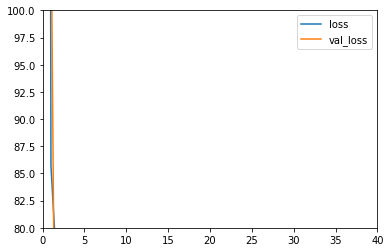

In [111]:
# results = pd.DataFrame(history.history)
# graph = results[['loss', 'val_loss']].plot()
# graph.set_xlim([0,40])
# graph.set_ylim([80,100])

In [112]:
# np.sqrt(results.iloc[-1,1])

3.931392668444175

In [115]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(13,)))
model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
model.add(layers.Dense(32, activation='relu', input_shape=(13,)))
model.add(layers.Dense(16, activation='relu', input_shape=(13,)))
model.add(layers.Dense(8, activation='relu', input_shape=(13,)))
model.add(layers.Dense(4, activation='relu', input_shape=(13,)))
model.add(layers.Dense(2, activation='relu', input_shape=(13,)))
model.add(layers.Dense(1))

optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(loss='mean_squared_error', optimizer=optimizer)

history = model.fit(x_train3, t_train,
                   batch_size=16,
                   epochs=100,
                   verbose=1,
                   validation_data=(x_val3, t_val))

Train on 146 samples, validate on 341 samples
Epoch 1/100
146/146 [==============================] - 1s 5ms/sample - loss: 527.6054 - val_loss: 494.8041
Epoch 2/100
146/146 [==============================] - 0s 332us/sample - loss: 506.2691 - val_loss: 465.2130
Epoch 3/100
146/146 [==============================] - 0s 376us/sample - loss: 465.5635 - val_loss: 407.3136
Epoch 4/100
146/146 [==============================] - 0s 379us/sample - loss: 387.6748 - val_loss: 304.0981
Epoch 5/100
146/146 [==============================] - 0s 326us/sample - loss: 260.2426 - val_loss: 160.3453
Epoch 6/100
146/146 [==============================] - 0s 313us/sample - loss: 122.9294 - val_loss: 71.9919
Epoch 7/100
146/146 [==============================] - 0s 313us/sample - loss: 74.1909 - val_loss: 52.2593
Epoch 8/100
146/146 [==============================] - 0s 327us/sample - loss: 49.7986 - val_loss: 45.8018
Epoch 9/100
146/146 [==============================] - 0s 309us/sample - loss: 39.5990 - 

Epoch 77/100
146/146 [==============================] - 0s 301us/sample - loss: 3.5958 - val_loss: 10.7172
Epoch 78/100
146/146 [==============================] - 0s 328us/sample - loss: 3.7819 - val_loss: 11.1280
Epoch 79/100
146/146 [==============================] - 0s 308us/sample - loss: 4.5882 - val_loss: 11.9774
Epoch 80/100
146/146 [==============================] - 0s 303us/sample - loss: 4.8138 - val_loss: 10.9413
Epoch 81/100
146/146 [==============================] - 0s 313us/sample - loss: 3.9977 - val_loss: 11.3751
Epoch 82/100
146/146 [==============================] - 0s 311us/sample - loss: 3.7689 - val_loss: 11.2303
Epoch 83/100
146/146 [==============================] - 0s 311us/sample - loss: 4.1416 - val_loss: 11.4920
Epoch 84/100
146/146 [==============================] - 0s 305us/sample - loss: 3.8036 - val_loss: 11.3096
Epoch 85/100
146/146 [==============================] - 0s 308us/sample - loss: 3.4001 - val_loss: 11.2049
Epoch 86/100
146/146 [===============

(80, 100)

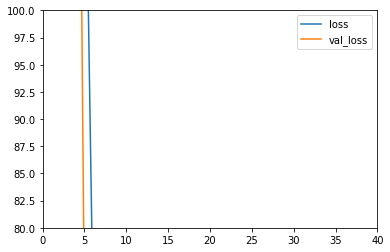

In [116]:
results = pd.DataFrame(history.history)
graph = results[['loss', 'val_loss']].plot()
graph.set_xlim([0,40])
graph.set_ylim([80,100])

In [117]:
np.sqrt(results.iloc[-1,1])

3.3599645654413055

In [124]:
# model = models.Sequential()
# model.add(layers.Dense(32, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(64, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(128, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(256, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(128, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(64, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(32, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(16, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(8, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(4, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(2, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(1))

# optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# model.compile(loss='mean_squared_error', optimizer=optimizer)

# history = model.fit(x_train3, t_train,
#                    batch_size=16,
#                    epochs=100,
#                    verbose=1,
#                    validation_data=(x_val3, t_val))

In [120]:
# np.sqrt(results.iloc[-1,1])

3.44909441353299

In [123]:
# model = models.Sequential()
# model.add(layers.Dense(256, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(128, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(64, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(32, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(16, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(8, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(4, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(2, kernel_initializer='normal', activation='relu', input_shape=(13,)))
# model.add(layers.Dense(1))

# optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# model.compile(loss='mean_squared_error', optimizer=optimizer)

# history = model.fit(x_train3, t_train,
#                    batch_size=16,
#                    epochs=100,
#                    verbose=1,
#                    validation_data=(x_val3, t_val))

In [122]:
# np.sqrt(results.iloc[-1,1])

3.44909441353299